In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 241114


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test/rice_random_gene_idmapping_all.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test/foldseek_hit_species_togoid_convert.tsv")

In [4]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Os01g0859200""","""Q94DD0""","""Q8IUS5""",9.3810e-12,1.0,26,19.1,0.191,73,5,347,347,32,362,362,382,0.988,0.914,0.4828,0.554,0.5339,0.5339,9.701,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SKLVLITAVALLGWAYKVA-RPPP---PPI…","""ASIHLLKLLWSLGKGPAQTFRRPAREHPP-…",219,"""0.692,0.714,0.733,0.750,0.765,…"
"""Os01g0859200""","""Q94DD0""","""Q99685""",2.3260e-11,1.0,21,17.7,0.177,56,41,337,347,19,285,303,315,0.856,0.881,0.4541,0.5321,0.5973,0.5973,5.605,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SPRVQLKDGRHLAYREA-GVGREIAKYKII…","""LPHLVNADGQYLFCRYWKPTG--TPKALIF…",193,"""0.378,0.590,0.640,0.688,0.628,…"
"""Os01g0859200""","""Q94DD0""","""Q8TB40""",2.7890e-11,1.0,18,14.6,0.146,48,40,337,347,44,335,342,328,0.859,0.854,0.4654,0.5333,0.5402,0.5402,7.691,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SSPRVQLKDGRHLAYREAGVGREIAK-YKI…","""LARYVSLPNQNKIWTVT--VSPEQNDRTPL…",214,"""0.167,0.320,0.679,0.700,0.797,…"
"""Os01g0859200""","""Q94DD0""","""Q9H6B9""",6.9150e-11,1.0,22,17.3,0.173,57,39,341,347,73,357,360,329,0.873,0.792,0.4855,0.541,0.5233,0.5233,7.893,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VSSPRVQLK-DGRHLAYREAGVGREIAKYK…","""GEHGFLNLKSSGLRLHYVSAG--RGNG-PL…",202,"""0.142,0.236,0.395,0.641,0.725,…"
"""Os01g0859200""","""Q94DD0""","""Q86WA6""",1.3460e-10,1.0,22,17.7,0.177,59,33,339,347,30,290,291,332,0.885,0.897,0.4727,0.4683,0.5459,0.5459,9.807,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GPG---GPPVSSPRVQLKDGRHLAYREAGV…","""GPAAAFGTSVTSAKVAVN-GVQLHYQQTGE…",177,"""0.087,0.143,0.118,0.094,0.125,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os04g0391500""","""Q7XVN5""","""Q8NDT2""",0.007744,0.301,24,12.7,0.127,61,120,470,470,130,544,890,478,0.747,0.466,0.3547,0.1478,0.09118,0.09118,30.38,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TVGIVPAEEYTVIELTGTDRP-----GLLS…","""GSSAAAPEYKTL--LISSLSPALPAEHLED…",227,"""0.071,0.139,0.169,0.269,0.283,…"
"""Os04g0391500""","""Q7XVN5""","""P31943""",0.00914,0.254,30,11.1,0.111,54,120,470,470,2,412,449,486,0.747,0.915,0.3245,0.1472,0.1527,0.1527,25.98,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""TVGIVPAEEYTVIELTGTDRPGLLS-EVCA…","""MLGTEGGEGFVV--KVRGLPWSCSADEVQR…",222,"""0.071,0.118,0.169,0.260,0.233,…"
"""Os04g0391500""","""Q7XVN5""","""O95758""",0.001841,0.254,32,10.8,0.108,63,1,424,470,32,549,552,580,0.902,0.938,0.281,0.1303,0.1134,0.1134,32.2,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MALTAAAASGGDAHDDEYAKLVRGMNPPRV…","""MNSSTPSTANGN-------------DSKKF…",299,"""0.812,0.800,0.833,0.750,0.611,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

<Figure size 4000x4000 with 0 Axes>

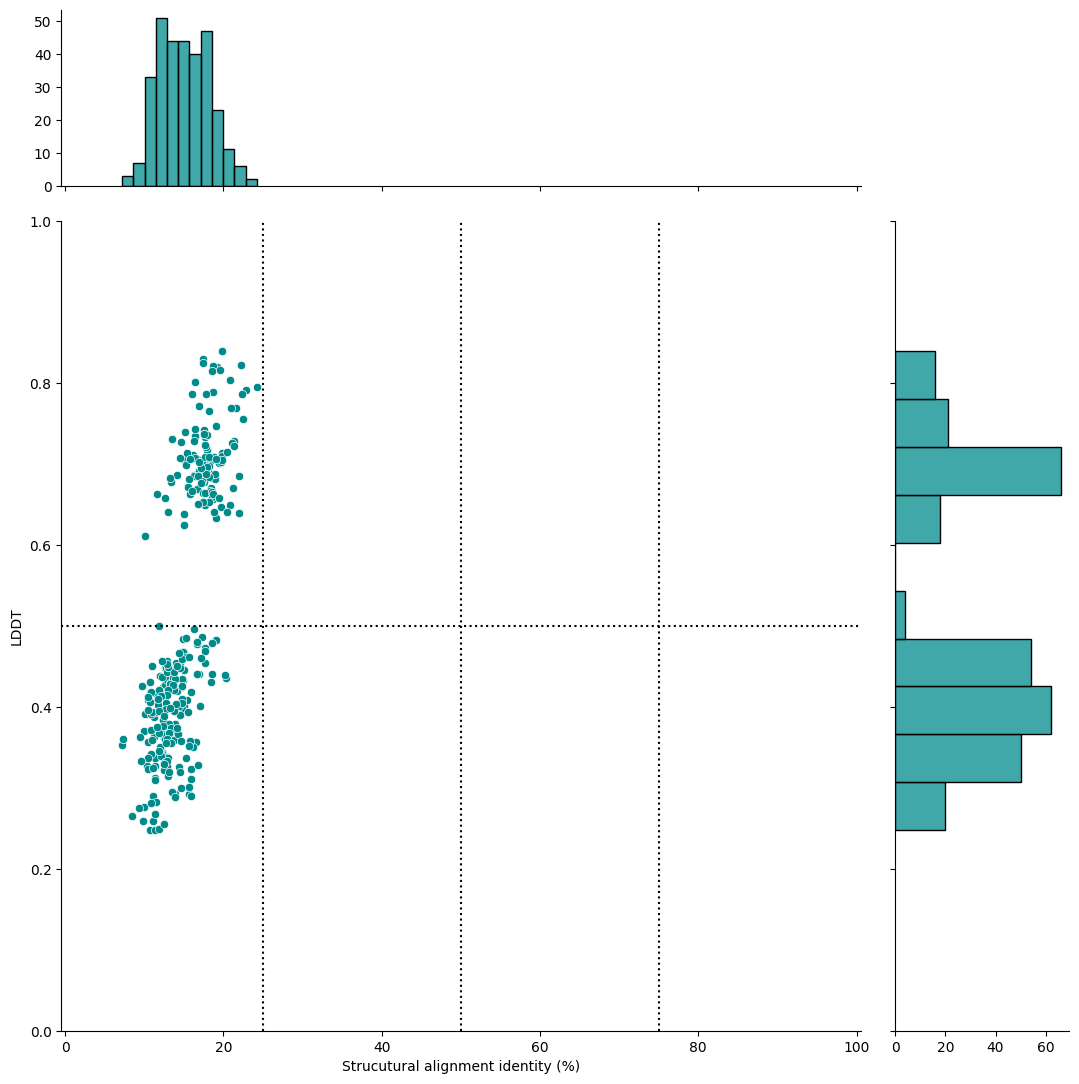

<Figure size 5000x5000 with 0 Axes>

In [5]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_result,
    x="pident", # Strucutural alignment identity (%) 
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)


plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Strucutural alignment identity (%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [6]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [7]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame())

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame())

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0P0UZ77""","""P82664""",40,"""13/40""",32.5,"""19/40""",47.5,"""3/40""",7.5,28.5
"""A0A0P0VAM0""","""O75608""",135,"""31/135""",23.0,"""53/135""",39.3,"""32/135""",23.7,69.0
"""A0A0P0VAM0""","""O95372""",162,"""39/162""",24.1,"""63/162""",38.9,"""52/162""",32.1,91.5
"""A0A0P0VAM0""","""O95870""",67,"""17/67""",25.4,"""32/67""",47.8,"""4/67""",6.0,51.0
"""A0A0P0VAM0""","""P07098""",420,"""86/420""",20.5,"""139/420""",33.1,"""155/420""",36.9,67.5
…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",138,"""30/138""",21.7,"""52/138""",37.7,"""39/138""",28.3,53.5
"""Q94DD0""","""Q9UMR5""",258,"""46/258""",17.8,"""81/258""",31.4,"""106/258""",41.1,38.5
"""Q94DD0""","""Q9UN36""",178,"""39/178""",21.9,"""65/178""",36.5,"""54/178""",30.3,65.0


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0P0UZ77""","""P82664""",418,"""7/418""",1.7,"""8/418""",1.9,"""399/418""",95.5,7.5
"""A0A0P0VAM0""","""O75608""",380,"""57/380""",15.0,"""96/380""",25.3,"""183/380""",48.2,50.0
"""A0A0P0VAM0""","""O95372""",388,"""64/388""",16.5,"""101/388""",26.0,"""198/388""",51.0,71.0
"""A0A0P0VAM0""","""O95870""",639,"""77/639""",12.1,"""125/639""",19.6,"""373/639""",58.4,19.5
"""A0A0P0VAM0""","""P07098""",460,"""92/460""",20.0,"""150/460""",32.6,"""175/460""",38.0,65.0
…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",668,"""10/668""",1.5,"""12/668""",1.8,"""637/668""",95.4,18.0
"""Q94DD0""","""Q9UMR5""",425,"""60/425""",14.1,"""109/425""",25.6,"""201/425""",47.3,21.5
"""Q94DD0""","""Q9UN36""",560,"""45/560""",8.0,"""79/560""",14.1,"""402/560""",71.8,38.5


In [8]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0P0UZ77""","""P82664""",40,418,"""13/40""","""7/418""",32.5,1.7,47.5,1.9,"""3/40""","""399/418""",7.5,95.5,28.5,7.5
"""A0A0P0VAM0""","""O75608""",135,380,"""31/135""","""57/380""",23.0,15.0,39.3,25.3,"""32/135""","""183/380""",23.7,48.2,69.0,50.0
"""A0A0P0VAM0""","""O95372""",162,388,"""39/162""","""64/388""",24.1,16.5,38.9,26.0,"""52/162""","""198/388""",32.1,51.0,91.5,71.0
"""A0A0P0VAM0""","""O95870""",67,639,"""17/67""","""77/639""",25.4,12.1,47.8,19.6,"""4/67""","""373/639""",6.0,58.4,51.0,19.5
"""A0A0P0VAM0""","""P07098""",420,460,"""86/420""","""92/460""",20.5,20.0,33.1,32.6,"""155/420""","""175/460""",36.9,38.0,67.5,65.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q94DD0""","""Q9ULP0""",138,668,"""30/138""","""10/668""",21.7,1.5,37.7,1.8,"""39/138""","""637/668""",28.3,95.4,53.5,18.0
"""Q94DD0""","""Q9UMR5""",258,425,"""46/258""","""60/425""",17.8,14.1,31.4,25.6,"""106/258""","""201/425""",41.1,47.3,38.5,21.5
"""Q94DD0""","""Q9UN36""",178,560,"""39/178""","""45/560""",21.9,8.0,36.5,14.1,"""54/178""","""402/560""",30.3,71.8,65.0,38.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [9]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (307, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q7XVN5      ┆ Q9UKA9     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A0A0P0VAM0  ┆ Q86WA6     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q5VPE3      ┆ Q99697     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q5VPE3      ┆ P31273     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os04g0391500""","""Q7XVN5""","""Q9UKA9""",0.0008496,0.326,32,11.5,0.115,64,1,424,470,32,528,531,556,0.902,0.936,0.2822,0.1316,0.1196,0.1196,28.86,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MALTAAAASGGDAHDDEYAKLVRGMNPPRV…","""MSSMVVTANGND-------------SKKFK…",301,"""0.938,0.900,1.000,0.906,0.861,…",187,694,"""39/187""","""69/694""",20.9,9.9,34.8,18.4,"""46/187""","""387/694""",24.6,55.8,45.5,32.0
"""Os01g0859200""","""A0A0P0VAM0""","""Q86WA6""",7.5990e-10,1.0,20,18.5,0.185,60,33,339,347,30,290,291,323,0.885,0.897,0.4782,0.4734,0.5557,0.5557,11.48,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GPG---GPPVSSPRVQLKDGRHLAYREAGV…","""GPAAAFGTSVTSAKVAVN-GVQLHYQQTGE…",185,"""0.083,0.143,0.118,0.097,0.135,…",305,375,"""67/305""","""75/375""",22.0,20.0,37.0,33.9,"""77/305""","""112/375""",25.2,29.9,88.0,76.0
"""Os06g0140700""","""Q5VPE3""","""Q99697""",0.000013,0.996,7,16.6,0.166,47,38,307,308,3,253,317,283,0.877,0.792,0.6691,0.1618,0.1573,0.1573,37.8,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AALNSIVGDVRRDQ---AAAHAAAAVGVGV…","""TNCRKLVSACVQLGVQPAAVECLFSKDSEI…",191,"""0.360,0.333,0.333,0.387,0.481,…",279,398,"""61/279""","""67/398""",21.9,16.8,39.4,26.4,"""64/279""","""171/398""",22.9,43.0,107.0,95.5
"""Os06g0140700""","""Q5VPE3""","""P31273""",0.0009204,0.998,3,17.4,0.174,36,2,173,308,34,210,242,206,0.558,0.731,0.8288,0.1918,0.2433,0.2433,28.83,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MDLGLSLGLGLASQGSLTSSTTTTSSPGAG…","""RSHALVYGPGGSAPGFQHASHHVQDFFHHG…",107,"""0.800,0.833,0.857,0.844,0.906,…",89,409,"""33/89""","""49/409""",37.1,12.0,57.3,17.6,"""4/89""","""268/409""",4.5,65.5,108.5,85.0
"""Os06g0140700""","""Q5VPE3""","""O14770""",0.03256,0.353,12,16.8,0.168,53,9,308,308,194,440,477,314,0.974,0.518,0.6509,0.1657,0.1118,0.1118,36.27,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GLGLASQGSLTSSTTTTSSPGAGSSSPWAA…","""GSSKSDHEELSGSSTNLADHNPSS------…",180,"""0.469,0.625,0.594,0.750,0.812,…",281,544,"""61/281""","""69/544""",21.7,12.7,33.1,19.9,"""77/281""","""303/544""",27.4,55.7,103.0,97.5


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (sequence alignment info vs LDDT)

<Figure size 4000x4000 with 0 Axes>

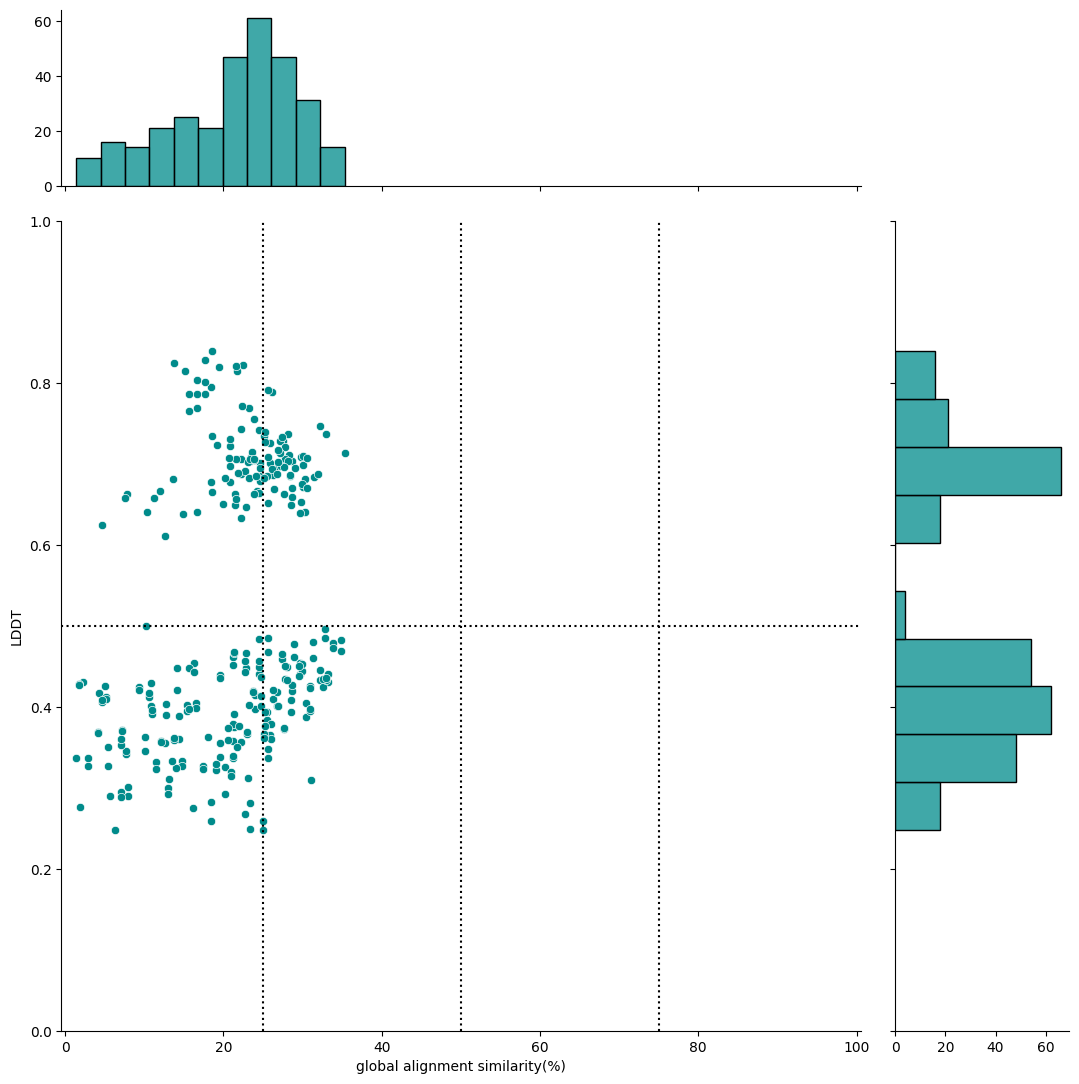

<Figure size 5000x5000 with 0 Axes>

In [11]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=join_foldseek,
    x="Similarity_percent_needle", # You can also use Identity_percent_water, Similarity_percent_needle, Similarity_percent_water
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
# plt.fill_betweenx(
#     y=[0.5, 1],
#     x1=-0.5,
#     x2=25,
#     color="red",
#     alpha=0.1
# )

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("global alignment similarity(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;


# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- Select the ones that have foldseek hit

In [12]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os01g0859200""",168,false
"""Os06g0140700""",121,false
"""Os04g0391500""",17,false
"""Os01g0187600""",1,false
"""Os12g0159500""",0,true
"""Os05g0468600""",0,true
"""Os12g0129300""",0,true
"""Os02g0609000""",0,true
"""Os01g0795250""",0,true


### Filter out the ones that have no foldseek hit

In [13]:
no_hit_genes_list = hit_count.filter(
    pl.col("foldseek no hit") == True
)

idmapping_list = pl.read_csv(
    query_uniprot_idmapping_tsv,
    separator='\t'
)
  
no_hit_idmapping_list = no_hit_genes_list.join(
    idmapping_list,
    on="From",
    how="left"
).sort(
    by=["From"],
    descending=[False]
)

print(no_hit_idmapping_list.group_by(["From"], maintain_order=True).n_unique())
display(no_hit_idmapping_list.head())

shape: (6, 4)
┌──────────────┬─────────────────────────────────┬─────────────────┬───────────────────┐
│ From         ┆ target hit count (gene level v… ┆ foldseek no hit ┆ UniProt Accession │
│ ---          ┆ ---                             ┆ ---             ┆ ---               │
│ str          ┆ u32                             ┆ u32             ┆ u32               │
╞══════════════╪═════════════════════════════════╪═════════════════╪═══════════════════╡
│ Os01g0795250 ┆ 1                               ┆ 1               ┆ 1                 │
│ Os02g0609000 ┆ 1                               ┆ 1               ┆ 2                 │
│ Os05g0352750 ┆ 1                               ┆ 1               ┆ 1                 │
│ Os05g0468600 ┆ 1                               ┆ 1               ┆ 1                 │
│ Os12g0129300 ┆ 1                               ┆ 1               ┆ 2                 │
│ Os12g0159500 ┆ 1                               ┆ 1               ┆ 3                 │
└──────

From,target hit count (gene level vs uniprot accession),foldseek no hit,UniProt Accession
str,u32,bool,str
"""Os01g0795250""",0,true,"""A0A0P0V975"""
"""Os02g0609000""",0,true,"""B9F105"""
"""Os02g0609000""",0,true,"""Q6K1X4"""
"""Os05g0352750""",0,true,"""A0A0N7KKL4"""
"""Os05g0468600""",0,true,"""A0A0P0WNJ6"""


&nbsp;

&nbsp;

## Filtering Condition2

In [14]:
condition2 = join_foldseek.sort(
        "qcov", descending=True
    ).unique(
        subset=["From", "foldseek hit"]
    ).sort(
        "qcov", descending=True
    )

print(condition2.group_by(["From"], maintain_order=True).n_unique())
display(condition2)

shape: (4, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os06g01407 ┆ 1          ┆ 121       ┆ 84     ┆ … ┆ 95        ┆ 102       ┆ 83        ┆ 86        │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os01g08592 ┆ 2          ┆ 89        ┆ 84     ┆ … ┆ 82        ┆ 80        ┆

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os06g0140700""","""Q5VPE3""","""O43364""",0.001461,0.941,8,17.3,0.173,57,1,308,308,58,340,376,329,1.0,0.753,0.6791,0.2118,0.1767,0.1767,49.84,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""SLNPGSHPRHGAGGRPKPSPAGSRGSPVPA…",205,"""0.875,0.850,0.833,0.929,0.875,…",172,459,"""49/172""","""74/459""",28.5,16.1,43.0,24.6,"""22/172""","""234/459""",12.8,51.0,121.5,97.0
"""Os06g0140700""","""Q5VPE3""","""Q9BQY4""",0.001199,0.912,8,14.6,0.146,46,1,308,308,49,288,288,313,1.0,0.833,0.7269,0.165,0.1761,0.1761,41.52,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""EPEQGTAAGEKLKSAGAQGGEEKDGGGEEK…",189,"""1.000,1.000,0.958,1.000,0.969,…",175,363,"""36/175""","""61/363""",20.6,16.8,33.1,25.3,"""52/175""","""130/363""",29.7,35.8,78.5,47.0
"""Os01g0859200""","""A0A0P0VAM0""","""Q8IUS5""",1.0420e-11,1.0,27,17.7,0.177,74,1,347,347,1,362,362,418,1.0,1.0,0.4688,0.5452,0.5257,0.5257,11.47,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MVALSKL---VLITAVALLGW--AYKVA--…","""MARLRDCLPRLMLTLRSLLFWSLVYCYCGL…",217,"""0.667,0.600,0.568,0.521,0.462,…",373,430,"""88/373""","""95/430""",23.6,22.1,36.7,34.9,"""118/373""","""151/430""",31.6,35.1,128.5,122.5
"""Os06g0140700""","""Q5VPE3""","""Q15583""",0.00232,0.747,9,17.6,0.176,59,1,308,308,57,343,401,334,1.0,0.716,0.6486,0.1649,0.1281,0.1281,39.55,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""LAYLPPAPWSSLATPSALLGSSCAPPPPPA…",202,"""0.938,1.000,1.000,0.893,0.938,…",296,435,"""62/296""","""77/435""",20.9,17.7,33.1,28.5,"""72/296""","""161/435""",24.3,37.0,101.0,78.5
"""Os06g0140700""","""Q5VPE3""","""P43699""",0.0004167,0.941,11,17.6,0.176,61,1,308,308,55,344,371,345,1.0,0.782,0.6633,0.1792,0.1496,0.1496,47.52,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""QHAVGHHGAVTAAYHMTAAGVPQLSHSAVG…",192,"""0.938,0.800,0.917,0.857,0.906,…",379,446,"""92/379""","""91/446""",24.3,20.4,32.7,27.6,"""154/379""","""213/446""",40.6,47.8,140.0,131.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""P13378""",0.007616,1.0,2,22.8,0.228,26,67,173,308,145,258,290,114,0.347,0.393,0.7906,0.19,0.2014,0.2014,12.97,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EEMYQGRASTSPDSAAALSSASGKRERELE…","""QPIFTTQQEAELVQYPDCKSSSGNIGEDPD…",81,"""0.281,0.406,0.562,0.656,0.625,…",257,399,"""63/257""","""66/399""",24.5,16.5,37.0,25.6,"""89/257""","""200/399""",34.6,50.1,114.5,95.0
"""Os06g0140700""","""Q5VPE3""","""Q96PT3""",0.005474,1.0,2,24.2,0.242,26,69,173,308,1,106,197,107,0.341,0.538,0.795,0.1899,0.2892,0.2892,18.96,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MYQGRASTSPDSAAALSSASGKRERELERS…","""MPAEVHGSPPASLCPCQSVKFRPGLPEMAL…",78,"""0.438,0.469,0.594,0.625,0.812,…",105,354,"""29/105""","""39/354""",27.6,11.0,41.9,18.4,"""11/105""","""203/354""",10.5,57.3,89.0,66.5
"""Os01g0859200""","""Q94DD0""","""P16233""",0.007209,0.975,8,16.5,0.165,21,57,167,347,79,195,465,127,0.32,0.252,0.3567,0.2234,0.173,0.173,5.241,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""AGVGREIAKYKIIFSHGFASTKESDF--PV…","""SNFKTN-RKTRFII-HGFIDKGEENWLANV…",80,"""0.114,0.165,0.338,0.471,0.384,…",296,654,"""53/296""",""

&nbsp;

&nbsp;

## Filtering Condition3

- select the ones with qcov (query coverage) >= 0.5 and tcov (target coverage) >= 0.5

In [15]:
condition3 = condition2.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).unique()

condition3_rm = condition2.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition3.group_by(["From"], maintain_order=True).n_unique())
display(condition3)

shape: (4, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os01g08592 ┆ 2          ┆ 61        ┆ 58     ┆ … ┆ 59        ┆ 56        ┆ 49        ┆ 54        │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os06g01407 ┆ 1          ┆ 98        ┆ 72     ┆ … ┆ 79        ┆ 85        ┆

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0859200""","""A0A0P0VAM0""","""Q9H6B9""",2.9540e-11,1.0,26,16.3,0.163,64,3,341,347,11,357,360,391,0.977,0.964,0.4965,0.5611,0.5428,0.5428,10.46,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ALSKLVLITAVALL-GWAYKVA--------…","""APSRLSLKLLRAFMWSLVFSVALVAAAVYG…",231,"""0.818,0.833,0.846,0.857,0.867,…",350,439,"""82/350""","""92/439""",23.4,21.0,36.0,32.8,"""117/350""","""171/439""",33.4,39.0,101.0,94.5
"""Os06g0140700""","""Q5VPE3""","""Q6ZNG2""",0.0004167,0.923,11,17.8,0.178,57,2,300,308,81,339,339,320,0.971,0.764,0.6875,0.1619,0.1471,0.1471,47.16,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MDLGLSLGLGLASQGSLTSSTT---TTSSP…","""VPLKLCPAAEQVSPAGAPYGTRWAFQVLSP…",181,"""0.650,0.667,0.821,0.719,0.938,…",272,414,"""65/272""","""75/414""",23.9,18.1,36.4,26.8,"""73/272""","""181/414""",26.8,43.7,119.0,103.0
"""Os01g0859200""","""A0A0P0VAM0""","""Q9UN36""",9.8680e-7,1.0,22,13.0,0.13,41,43,340,347,42,299,371,314,0.859,0.695,0.4202,0.4886,0.4616,0.4616,6.388,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""RVQLKDGRHLAYREAGVGREIAKYKIIFSH…","""SVETPYG-SVTFTVYGTPKPKR-PAILTYH…",201,"""0.531,0.553,0.524,0.561,0.445,…",178,560,"""39/178""","""45/560""",21.9,8.0,36.5,14.1,"""54/178""","""402/560""",30.3,71.8,65.0,38.5
"""Os01g0859200""","""A0A0P0VAM0""","""Q5VUY2""",0.000007,1.0,19,14.1,0.141,48,37,336,347,85,398,407,339,0.865,0.771,0.3741,0.456,0.401,0.401,13.18,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""PPVSSPRVQLKDGRHLAYREAGVGREIAKY…","""PELVVTDLRFG-TIPVRLFQPKAASSRPRR…",227,"""0.096,0.152,0.159,0.223,0.310,…",107,545,"""22/107""","""67/545""",20.6,12.3,29.9,20.6,"""49/107""","""336/545""",45.8,61.7,43.0,11.0
"""Os06g0140700""","""Q5VPE3""","""P35452""",0.001368,0.999,4,19.5,0.195,39,1,179,308,98,269,270,200,0.581,0.637,0.8152,0.2091,0.2372,0.2372,31.9,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""AKFYAPEAAAGPEERGRTRPSFAPESSLAP…",112,"""1.000,0.950,0.917,0.929,0.969,…",217,405,"""53/217""","""55/405""",24.4,13.6,37.8,21.7,"""67/217""","""232/405""",30.9,57.3,135.5,115.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os01g0859200""","""Q94DD0""","""Q5EB52""",7.3290e-10,1.0,23,16.6,0.166,61,1,332,347,1,324,335,367,0.957,0.967,0.4771,0.5273,0.5441,0.5441,8.791,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MVALSKL---------VLITAVALLGWAYK…","""MVRRDRLRRMREWWVQVGLLAVPLLAAYLH…",228,"""0.750,0.600,0.545,0.500,0.462,…",159,418,"""38/159""","""74/418""",23.9,17.7,39.6,28.9,"""29/159""","""154/418""",18.2,36.8,46.0,28.0
"""Os06g0140700""","""Q5VPE3""","""Q92988""",0.0001188,0.991,11,19.4,0.194,60,1,292,308,16,240,240,308,0.948,0.938,0.7009,0.1524,0.1954,0.1954,35.04,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MMDLGLSLGLGLASQGSLTSSTTTTSSPGA…","""AVFPDLAPVPSVAAAYPLGLSPTTAASPNL…",149,"""1.000,1.000,0.917,1.000,0.969,…",172,343,"""43/172""","""55/343""",25.0,16.0,40.1,25.9,"""32/172""","""138/343""",18.6,40.2,95.5,85.5
"""Os06g0140700""","""Q5VPE3""","""O95096""",0.000032,0.996,10,18.4,0.184,54,2,281,308,37,272,273,293,0.909,0.864,0.6855,0.1741,0.1957,0.1957,28.58,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MDLGLSLGLGLASQGSLTSSTTTTSSP--G…","""EGPEPAKRAGPLGQGALDAVQSLPLKNPFY…",169,"""0.550,0.625,0.714,0.750,0.84

&nbsp;

&nbsp;


## Filtering Condition4

- select the ones that can be converted to HGNC Gene symbol through Ensembl ID by TogoID
- Article: [TogoID: an exploratory ID converter to bridge biological dataset](https://doi.org/10.1093/bioinformatics/btac491)

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null()
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A1W2PPF3""","""ENSP00000491301""","""ENST00000633875""","""ENSG00000282757""",33345,"""DUXB"""
"""A0A1W2PPM1""","""ENSP00000491599""","""ENST00000640559""","""ENSG00000283755""",51815,"""CPHXL"""
"""A2RU54""","""ENSP00000341108""","""ENST00000339992""","""ENSG00000188816""",5018,"""HMX2"""
"""A6NCS4""","""ENSP00000320089""","""ENST00000325017""","""ENSG00000180053""",32940,"""NKX2-6"""
"""A6NHT5""","""ENSP00000350549""","""ENST00000357878""","""ENSG00000188620""",5019,"""HMX3"""
…,…,…,…,…,…
"""Q9Y570""","""ENSP00000329867""","""ENST00000328257""","""ENSG00000214517""",30178,"""PPME1"""
"""Q9Y570""","""ENSP00000381461""","""ENST00000398427""","""ENSG00000214517""",30178,"""PPME1"""
"""Q9Y5X9""","""ENSP00000261292""","""ENST00000261292""","""ENSG00000101670""",6623,"""LIPG"""


In [17]:
condition4 = condition3.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).filter(
    pl.col("ensembl_gene_id").is_not_null()
).group_by(
    pl.exclude(
        [
            "hgnc_id", "hgnc_symbol_id", "ensembl_gene_id", "ensembl_protein_id", "ensembl_transcript_id"
        ]
    ),
    maintain_order=True
).agg(
    pl.col("hgnc_id"),
    pl.col("hgnc_symbol_id"),
    pl.col("ensembl_gene_id"),
    pl.col("ensembl_protein_id"),
    pl.col("ensembl_transcript_id"),
).drop(
    [
        "hgnc_id",
        "ensembl_transcript_id"
    ]
).sort(
    by=["From"],
    descending=[False]
)

display(condition4)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle,hgnc_symbol_id,ensembl_gene_id,ensembl_protein_id
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,list[str],list[str],list[str]
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""",0.01979,0.15,12,9.9,0.099,20,9,187,236,38,199,201,201,0.758,0.806,0.2763,0.1732,0.1954,0.1954,24.54,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ETVTCSKAVNSDLFDAVLGGLGQFGVITRA…","""LSTNMKWVQFSNLHVDVPKDL----TKPVV…",120,"""0.152,0.167,0.157,0.154,0.171,…",40,418,"""13/40""","""7/418""",32.5,1.7,47.5,1.9,"""3/40""","""399/418""",7.5,95.5,28.5,7.5,"[""MRPS10""]","[""ENSG00000048544""]","[""ENSP00000053468""]"
"""Os01g0859200""","""A0A0P0VAM0""","""Q9H6B9""",2.9540e-11,1.0,26,16.3,0.163,64,3,341,347,11,357,360,391,0.977,0.964,0.4965,0.5611,0.5428,0.5428,10.46,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ALSKLVLITAVALL-GWAYKVA--------…","""APSRLSLKLLRAFMWSLVFSVALVAAAVYG…",231,"""0.818,0.833,0.846,0.857,0.867,…",350,439,"""82/350""","""92/439""",23.4,21.0,36.0,32.8,"""117/350""","""171/439""",33.4,39.0,101.0,94.5,"[""EPHX3"", ""EPHX3"", ""EPHX3""]","[""ENSG00000105131"", ""ENSG00000105131"", ""ENSG00000105131""]","[""ENSP00000221730"", ""ENSP00000410323"", ""ENSP00000469345""]"
"""Os01g0859200""","""A0A0P0VAM0""","""Q9UN36""",9.8680e-7,1.0,22,13.0,0.13,41,43,340,347,42,299,371,314,0.859,0.695,0.4202,0.4886,0.4616,0.4616,6.388,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""RVQLKDGRHLAYREAGVGREIAKYKIIFSH…","""SVETPYG-SVTFTVYGTPKPKR-PAILTYH…",201,"""0.531,0.553,0.524,0.561,0.445,…",178,560,"""39/178""","""45/560""",21.9,8.0,36.5,14.1,"""54/178""","""402/560""",30.3,71.8,65.0,38.5,"[""NDRG2"", ""NDRG2"", … ""NDRG2""]","[""ENSG00000165795"", ""ENSG00000165795"", … ""ENSG00000165795""]","[""ENSP00000451712"", ""ENSP00000452038"", … ""ENSP00000298684""]"
"""Os01g0859200""","""A0A0P0VAM0""","""Q5VUY2""",0.000007,1.0,19,14.1,0.141,48,37,336,347,85,398,407,339,0.865,0.771,0.3741,0.456,0.401,0.401,13.18,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""PPVSSPRVQLKDGRHLAYREAGVGREIAKY…","""PELVVTDLRFG-TIPVRLFQPKAASSRPRR…",227,"""0.096,0.152,0.159,0.223,0.310,…",107,545,"""22/107""","""67/545""",20.6,12.3,29.9,20.6,"""49/107""","""336/545""",45.8,61.7,43.0,11.0,"[""AADACL4""]","[""ENSG00000204518""]","[""ENSP00000365395""]"
"""Os01g0859200""","""Q94DD0""","""O95372""",0.001246,0.997,24,13.9,0.139,47,45,340,347,10,229,231,336,0.853,0.952,0.3787,0.3525,0.507,0.507,10.53,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""QLKDGRHLAYREAGVGREIAKYKIIFSHGF…","""LLTD-----AATVS-GAERETAAVIFLHGL…",133,"""0.201,0.250,0.195,0.182,0.360,…",162,388,"""39/162""","""64/388""",24.1,16.5,38.9,26.0,"""52/162""","""198/388""",32.1,51.0,91.5,71.0,"[""LYPLA2""]","[""ENSG00000011009""]","[""ENSP00000363638""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""O15499""",0.0003901,1.0,4,22.5,0.225,42,6,179,308,34,193,205,186,0.565,0.78,0.7558,0.1939,0.2893,0.2893,26.93,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LSLGLGLASQGSLTSSTTTTSSPGAGSSSP…","""LPARAACPPQPAGRQSPAKPEEPGAPEAAP…",106,"""0.312,0.438,0.562,0.562,0.625,…",151,341,"""42/151""","""52/341""",27.8,15.2,41.1,23.8,"""24/151""","""169/341""",15.9,49.6,111.0,102.5,"[""GSC2""]","[""ENSG00000063515""]","[""ENSP00000086933""]"
"""Os06g0140700""","""Q5VPE3""","""P49640""",0.0001188,0.988,9,19.8,0.

In [18]:
hit_count_condition4 = condition4.group_by(
    ["From"],
    maintain_order=True
).agg(
    (pl.col("foldseek hit").count().alias("hit count (gene level)"))
).sort(
    by=["hit count (gene level)"],
    descending=True
)

display(hit_count_condition4)

From,hit count (gene level)
str,u32
"""Os06g0140700""",95
"""Os01g0859200""",61
"""Os04g0391500""",10
"""Os01g0187600""",1


In [19]:
foldseek_filter_viz = condition4.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (167, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01876 ┆ A0A0P0UZ77 ┆ P82664     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os01g08592 ┆ A0A0P0VAM0 ┆ Q9BV23     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0187600""","""A0A0P0UZ77""","""P82664""",0.758,0.806,24.54,0.2763,1.7,32.5,1.9,47.5
"""Os01g0859200""","""A0A0P0VAM0""","""Q9BV23""",0.853,0.81,10.96,0.4256,17.6,31.5,30.9,50.5
"""Os01g0859200""","""A0A0P0VAM0""","""Q9NZD8""",0.859,0.825,7.571,0.4664,11.5,22.0,21.3,39.4
"""Os01g0859200""","""Q94DD0""","""Q8N2K0""",0.873,0.671,9.593,0.4089,16.4,21.7,28.5,37.0
"""Os01g0859200""","""Q94DD0""","""Q9NV23""",0.818,0.891,8.279,0.3686,2.1,28.6,4.1,48.6
…,…,…,…,…,…,…,…,…,…,…
"""Os06g0140700""","""Q5VPE3""","""O15499""",0.565,0.78,26.93,0.7558,15.2,27.8,23.8,41.1
"""Os06g0140700""","""Q5VPE3""","""P31249""",1.0,0.671,44.93,0.7022,17.1,24.0,26.9,36.4
"""Os06g0140700""","""Q5VPE3""","""Q9H9S0""",0.99,0.905,44.38,0.7058,18.4,24.7,27.8,37.1


<Figure size 4000x4000 with 0 Axes>

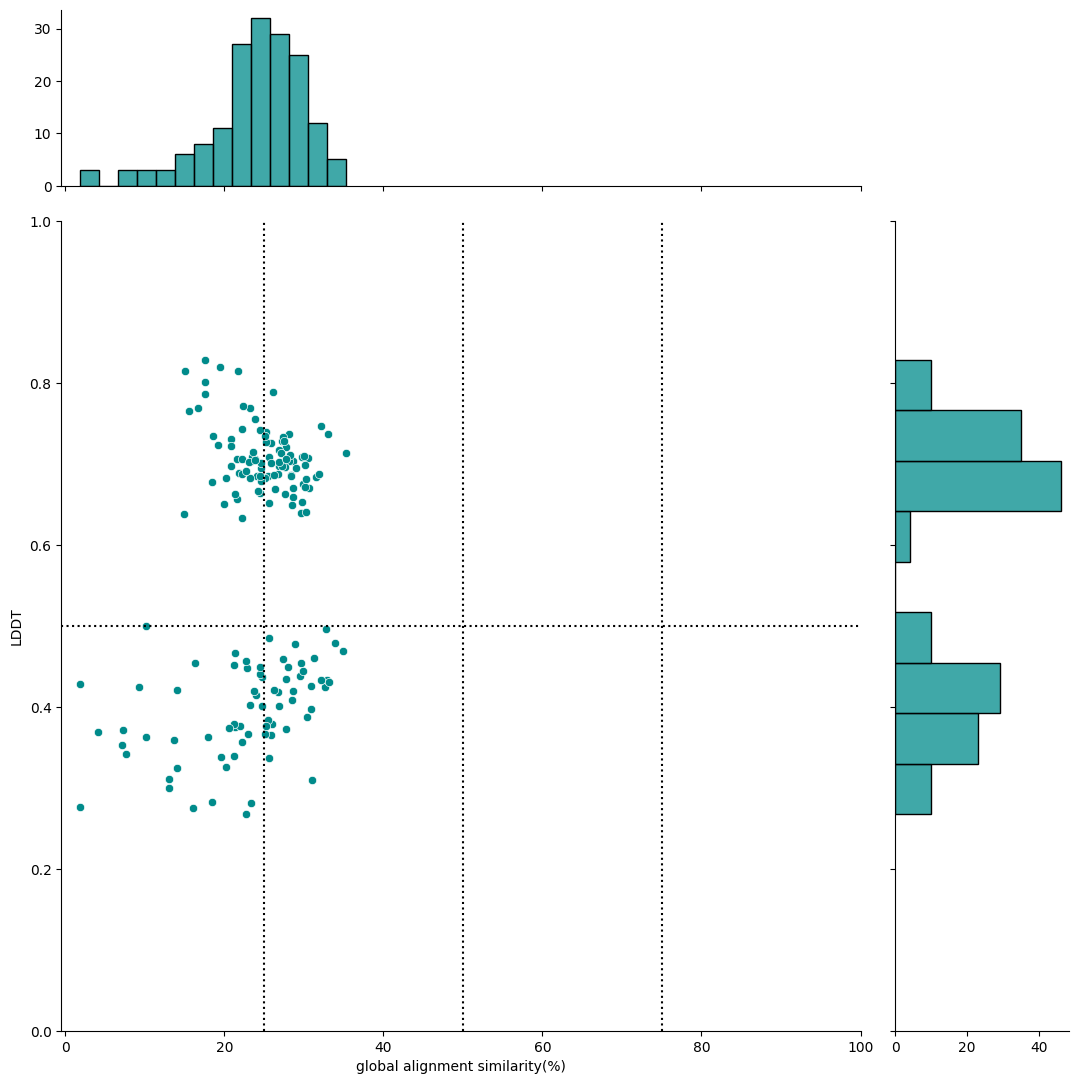

<Figure size 5000x5000 with 0 Axes>

In [21]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz,
    x="Similarity_percent_needle",
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
# plt.fill_betweenx(
#     y=[0.5, 1],
#     x1=-0.5,
#     x2=25,
#     color="red",
#     alpha=0.1
# )

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("global alignment similarity(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;
